# Vertex embeddings of the corpus callosum produced by the omnibus embedding

In this notebook, we demonstrate the power of the omnibus embedding (`omni`).
`omni` is a joint graph embedding method that maps the each vertex from every
connectome in a dataset to a vector in $d$-dimensional Euclidean space.

The corpus callosum is the bridge between the left and right hemispheres of the 
brain. In the BTBR mouse, the corpus callosum is absent. That is, there is very
little cross-hemispheric communication in these mice.

We demonstrate a use of `omni` by plotting the result of embedding the corpus
callosum in a low dimensional space.

This notebook replicates Figure 3 in _Multiscale Comparative Connectomics._
![Fig3](figures/3_corpus_callosum_embedding.jpg)

In [1]:
%load_ext nb_black

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from graspologic.embed import OmnibusEmbed
from graspologic.datasets import load_mice

from pairplot import ellipse_pairgrid

%matplotlib inline

In [3]:
ventricles = [147, 151, 160]
ventricles += [roi + 166 for roi in ventricles]
ventricles = np.array(ventricles)

def mask_rois(graphs, rois=ventricles):
    """Remove all connections to and from specified ROIs."""
    graphs = np.delete(graphs, ventricles, axis=1)
    graphs = np.delete(graphs, ventricles, axis=2)
    return graphs

In [4]:
# Load the full mouse dataset
mice = load_mice()

# Stack all adjacency matrices in a 3D numpy array
graphs = np.array(mice.graphs)
graphs = mask_rois(graphs)

# Sort the connectomes and genotypic labels so BTBR is first
label_indices = np.argsort(mice.labels).reshape(4, 8)
label_indices = label_indices[[1, 0, 2, 3]].reshape(-1)

labels = mice.labels[label_indices]
graphs = graphs[label_indices]

In [5]:
# Jointly embed graphs using omnibus embedding
embedder = OmnibusEmbed()
omni_embedding = embedder.fit_transform(graphs)
print(omni_embedding.shape)

(32, 326, 5)


In [6]:
def plot_vertex_embedding(structure, hemisphere):
    """Plot the omnibus embedding of a specific ROI for all strains."""

    # Get index for the input structure
    index = mice.atlas.query(f"Structure == '{structure}'")["ROI"].values[0]
    index = index + 166 if hemisphere == "R" else index
    index -= 1

    # Make the plot
    g = ellipse_pairgrid(omni_embedding[:, index, :3], labels, ci=0.9)
    structure = " ".join(structure.split("_"))
    g.fig.suptitle(f"{structure} ({hemisphere})", y=1.025)
    g.fig.set(dpi=300)
    g.add_legend()
    plt.show()

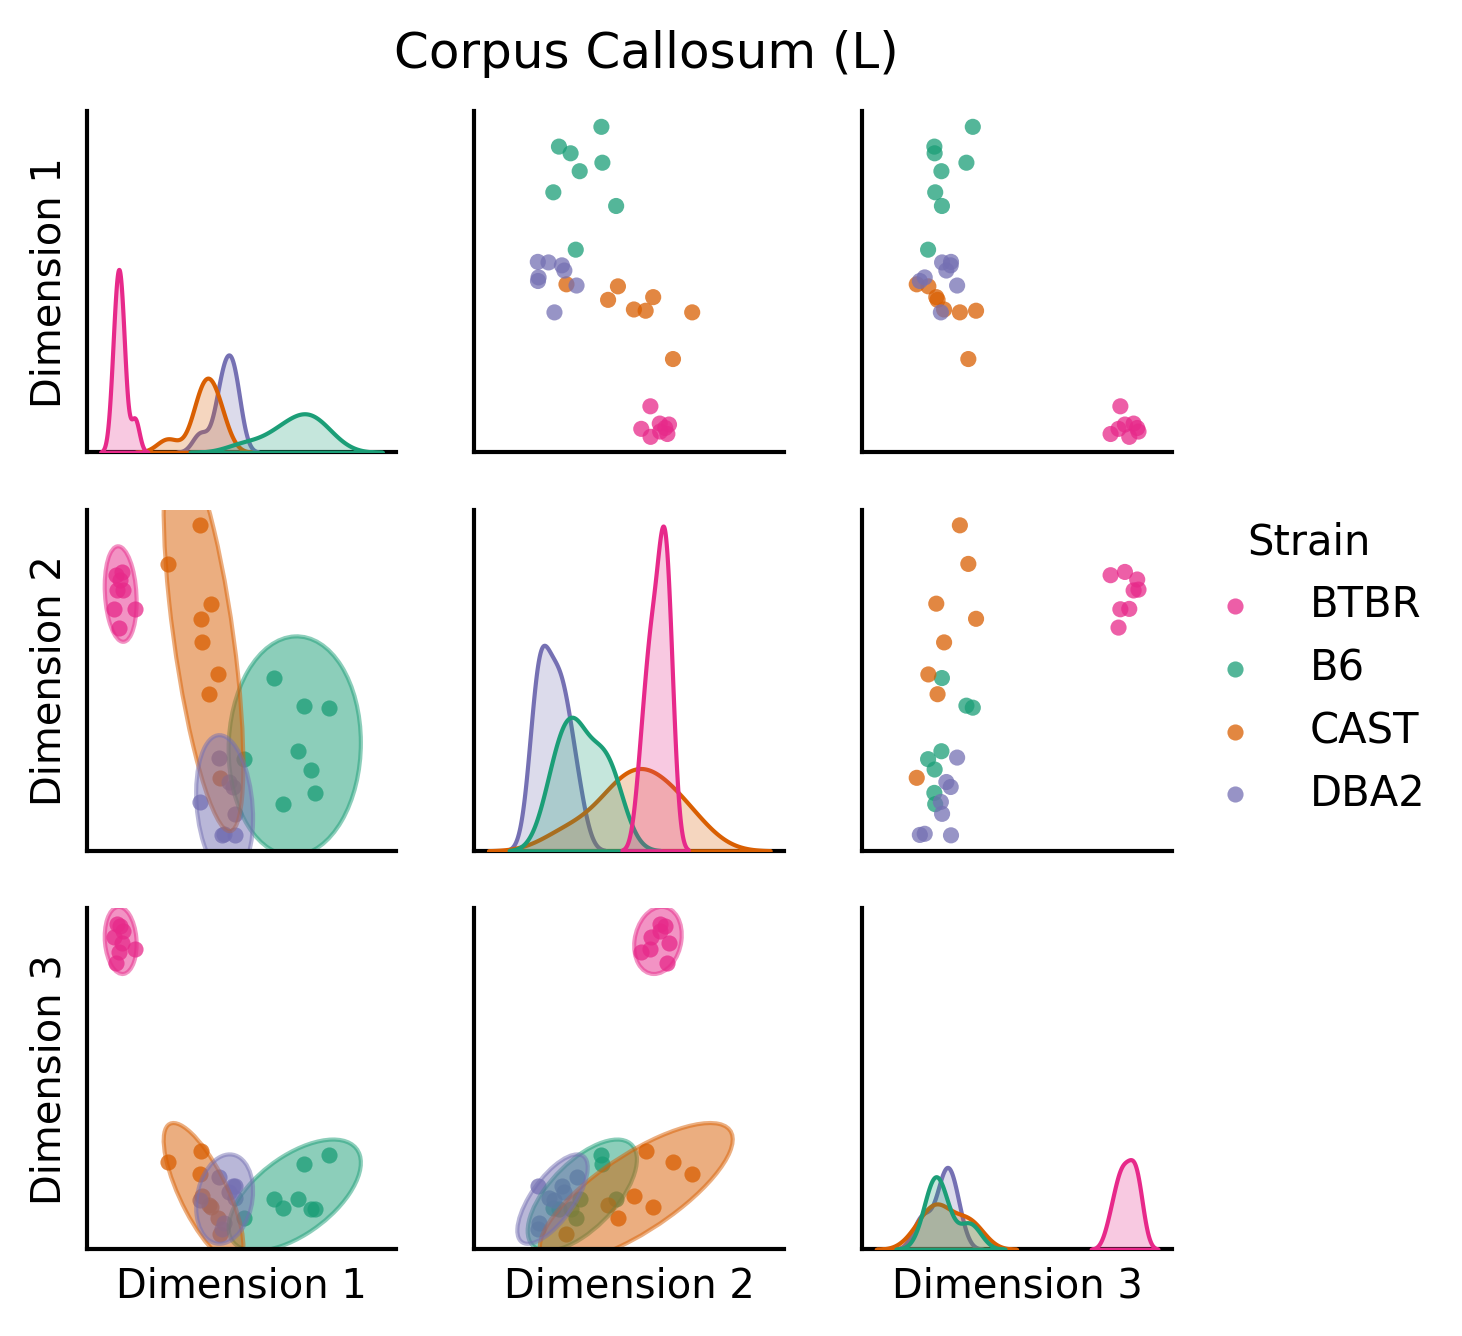

In [7]:
plot_vertex_embedding("Corpus_Callosum", "L")

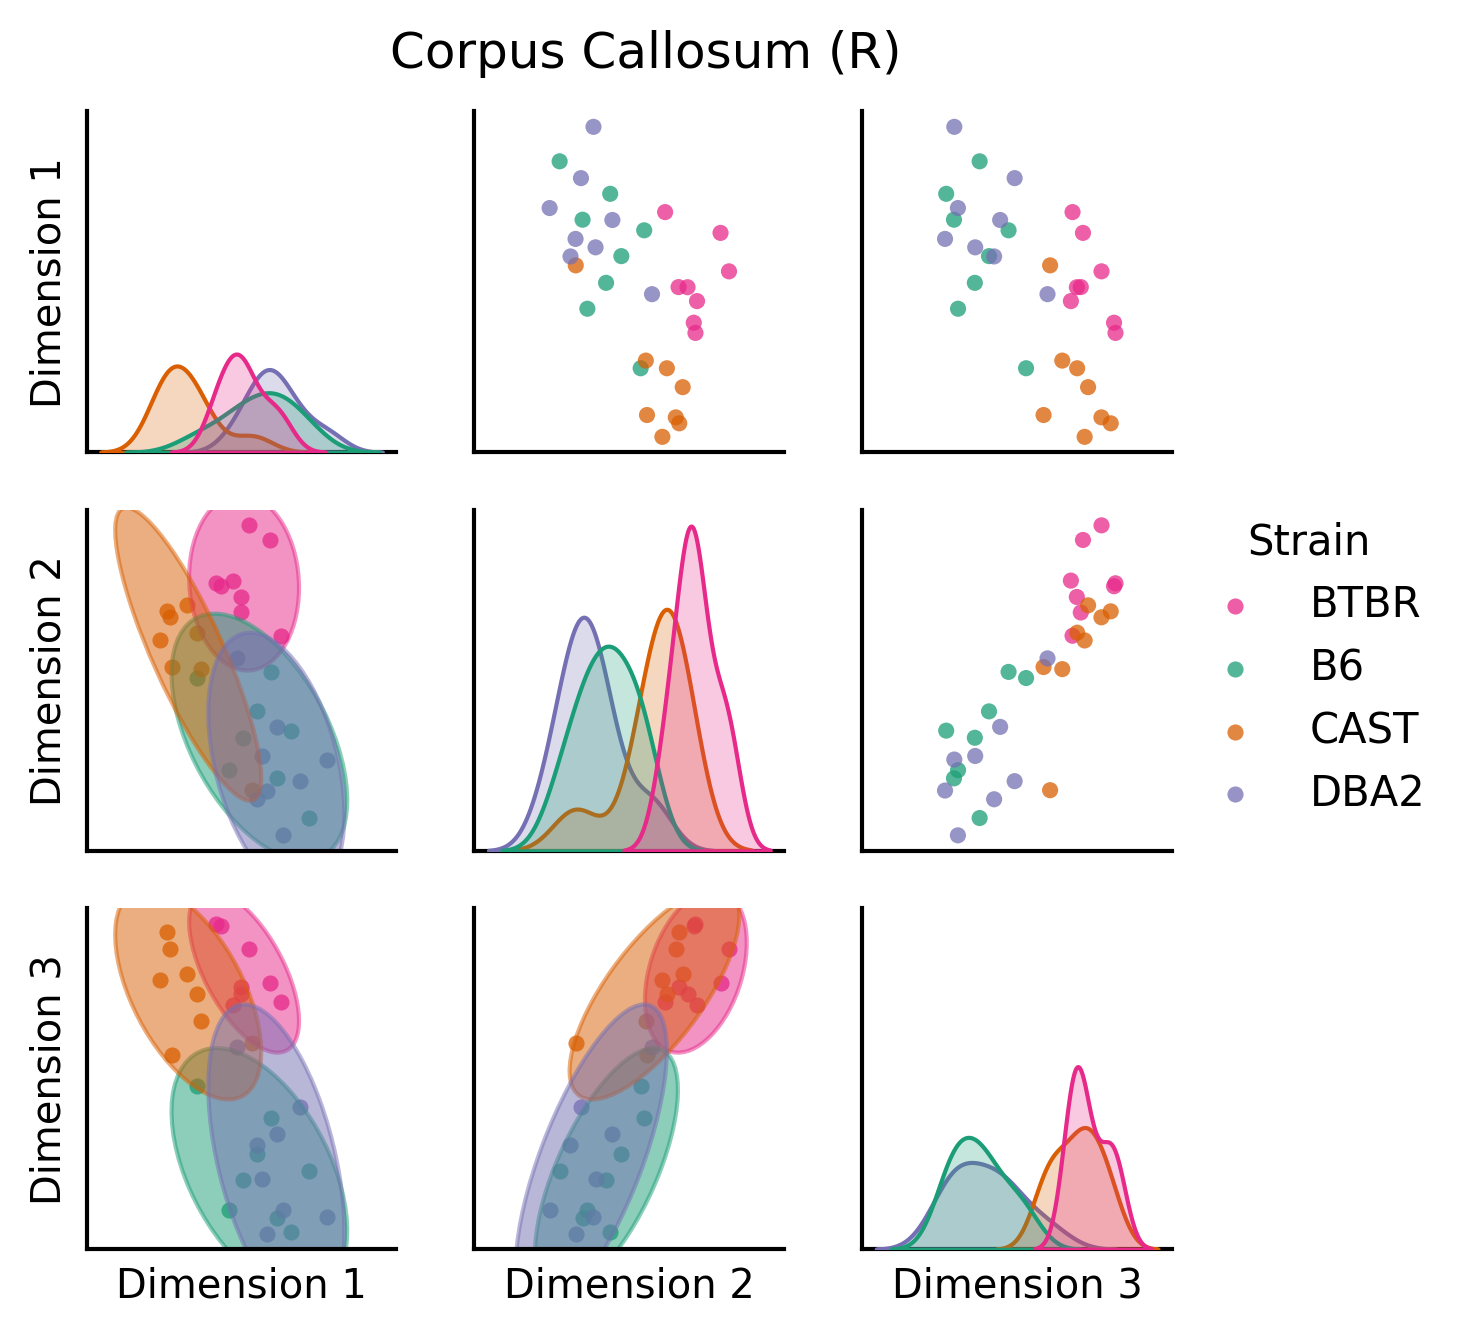

In [8]:
plot_vertex_embedding("Corpus_Callosum", "R")